In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('IFND.csv', encoding='latin-1')
df['Label'] = df['Label'].replace('TRUE', 0)
df['Label'] = df['Label'].replace('Fake', 1)
df

,id,Statement,Image,Web,Category,Date,Label
0,2,"WHO praises India's Aarogya Setu app, says it ...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,Oct-20,0
1,3,"In Delhi, Deputy US Secretary of State Stephen...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,VIOLENCE,Oct-20,0
2,4,LAC tensions: China's strategy behind delibera...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,TERROR,Oct-20,0
3,5,India has signed 250 documents on Space cooper...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,Oct-20,0
4,6,Tamil Nadu chief minister's mother passes away...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,ELECTION,Oct-20,0
...,...,...,...,...,...,...,...
56709,56711,Fact Check: This is not Bruce Lee playing ping...,https://akm-img-a-in.tosshub.com/indiatoday/im...,INDIATODAY,MISLEADING,11-2019,1
56710,56712,Fact Check: Did Japan construct this bridge in...,https://akm-img-a-in.tosshub.com/indiatoday/im...,INDIATODAY,COVID-19,10-2019,1
56711,56713,Fact Check: Viral video of Mexico earthquake i...,https://akm-img-a-in.tosshub.com/indiatoday/im...,INDIATODAY,MISLEADING,10-2019,1
56712,56714,Fact Check: Ballet performance by Chinese coup...,https://akm-img-a-in.tosshub.com/indiatoday/im...,INDIATODAY,COVID-19,9-2019,1


# 1 - unreliable, 0 - reliable

In [5]:
x = df.drop('Label', axis=1)
y = df['Label']
x

,id,Statement,Image,Web,Category,Date
0,2,"WHO praises India's Aarogya Setu app, says it ...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,Oct-20
1,3,"In Delhi, Deputy US Secretary of State Stephen...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,VIOLENCE,Oct-20
2,4,LAC tensions: China's strategy behind delibera...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,TERROR,Oct-20
3,5,India has signed 250 documents on Space cooper...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,Oct-20
4,6,Tamil Nadu chief minister's mother passes away...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,ELECTION,Oct-20
...,...,...,...,...,...,...
56709,56711,Fact Check: This is not Bruce Lee playing ping...,https://akm-img-a-in.tosshub.com/indiatoday/im...,INDIATODAY,MISLEADING,11-2019
56710,56712,Fact Check: Did Japan construct this bridge in...,https://akm-img-a-in.tosshub.com/indiatoday/im...,INDIATODAY,COVID-19,10-2019
56711,56713,Fact Check: Viral video of Mexico earthquake i...,https://akm-img-a-in.tosshub.com/indiatoday/im...,INDIATODAY,MISLEADING,10-2019
56712,56714,Fact Check: Ballet performance by Chinese coup...,https://akm-img-a-in.tosshub.com/indiatoday/im...,INDIATODAY,COVID-19,9-2019


In [6]:
y.value_counts(0)

Label
0    37800
1    18914
Name: count, dtype: int64

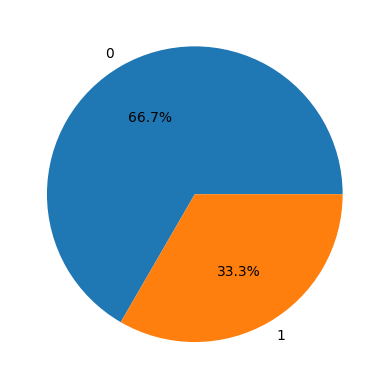

In [7]:
import matplotlib.pyplot as plt
labels = ['0','1']
plt.pie(y.value_counts(), labels=labels, autopct='%1.1f%%')
plt.show()

# the data is imbalanced

In [10]:
from nltk.corpus import stopwords
import string
from nltk.stem.snowball import SnowballStemmer
sn = SnowballStemmer(language='english')

In [11]:
import re
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', str(df['Statement'][i]))
    review = review.lower()
    review = review.split()
    
    review = [sn.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    
corpus

['prais india aarogya setu app say help identifi covid cluster',
 'delhi deputi us secretari state stephen biegun pitch pax indo pacifica',
 'lac tension china strategi behind deliber fail talk india',
 'india sign document space cooper countri isro chief',
 'tamil nadu chief minist mother pass away',
 'bihar assembl elect tej pratap shift mahua hasanpur',
 'hathra case cbi reach victim villag visit crime scene',
 'rajasthan crime news karauli anoth elder beaten death sikar five youth custodi',
 'mumbai bmc book penalis peopl step without face mask',
 'covid india singl day spike drop talli approach lakh',
 'amid stubbl burn delhi air qualiti deterior poor',
 'bihar assembl elect bjp expel nine rebel contest elect nda candid',
 'pm modi releas balasaheb vikh patil autobiographi',
 'post offic recruit big vacanc post th pass check elig pay scale',
 'mumbai power outag fire report hospit',
 'tamil nadu covid recoveri touch six lakh mark activ case',
 'indian export armenia increas three 

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features=6000)
x = tf.fit_transform(corpus).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_temp, y_train, y_temp = train_test_split(x,y, test_size=0.20, random_state=42)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.20, random_state=42)

In [17]:
# Calculate class weights
class_weights = dict(zip(range(len(set(y_train))), (x_train.shape[0] / (len(set(y_train)) * (y_train == i).sum()) for i in set(y_train))))
class_weights

{0: 0.7499834699814864, 1: 1.5000661244462077}

In [32]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(class_prior=None, fit_prior=False, alpha=1.25)  # Set fit_prior=False to use class weights
clf.fit(x_train, y_train, sample_weight=[class_weights[label] for label in y_train])

MultinomialNB(alpha=1.25, fit_prior=False)

In [33]:
p1 = clf.predict(x_valid)
p2 = clf

In [34]:
from sklearn.metrics import accuracy_score, precision_score
accuracy_score(p1, y_valid)

0.9080890456248623

In [35]:
precision_score(p1, y_valid)

0.898019801980198

# the passive aggresive classifier algorithm also works great with texts

In [41]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(class_weight=class_weights, random_state=100)
pac.fit(x_train, y_train)
p2 = pac.predict(x_valid)
print(accuracy_score(p2, y_valid))
print(precision_score(p2, y_valid))

0.911505400044082
0.9072607260726072
